# Point Pattern Analysis

## Centrography of Point Patterns

Centrography refers to a set of descriptive statistics that provide summary descriptions of point patterns. Let's explore three types of centrography analysis for point patterns.

In [2]:
# Run this cell to install pointpats library
%pip install -U pointpats

In [7]:
import numpy as np
from pointpats import PointPattern
%matplotlib inline
import matplotlib.pyplot as plt

#import centragraphy analysis functions 
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse

We will explore three measurements:

`Central Tendency`
* mean_center: calculate the mean center of the unmarked point pattern.
* weighted_mean_center: calculate the weighted mean center of the marked point pattern.

`Dispersion and Orientation`
* std_distance: calculate the standard distance

All of the above functions operate on a series of coordinate pairs. That is, the data type of the first argument should be  (𝑛,2) array_like. In case that you have a point pattern (PointPattern instance), you need to pass its attribute "points" instead of itself to these functions.

In [3]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
pp = PointPattern(points) #create a point pattern "pp" from list
pp.points 

,x,y
0,66.22,32.54
1,22.52,22.39
2,31.01,81.21
3,9.47,31.02
4,30.78,60.10
5,75.21,58.93
6,79.26,7.68
7,8.23,39.93
8,98.73,77.17
9,89.78,42.53


We can use PointPattern class method plot to visualize pp.

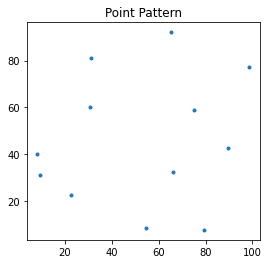

In [4]:
pp.plot()

### Central Tendency

Central Tendency concerns about the center point of the two-dimensional distribution. It is similar to the first moment of a one-dimensional distribution. There are several ways to measure central tendency, each having pros and cons. We need to carefully select the appropriate measure according to our objective and data status.

<b>Mean Center</b> (𝑥<sub>𝑚𝑐</sub>, 𝑦<sub>𝑚𝑐</sub>)

$$
  x_{mc} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
$$
  y_{mc} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

In [8]:
mc = mean_center(pp.points)
mc

array([52.57166667, 46.17166667])

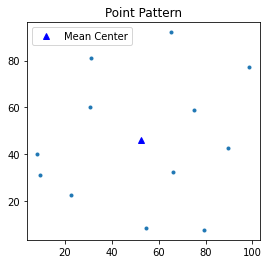

In [9]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)

<b>Weighted Mean Center</b>  (𝑥<sub>𝑤𝑚𝑐</sub>, 𝑦<sub>𝑤𝑚𝑐</sub>)

$$
x_{wmc} = \sum_{i=1}^{n} \frac{w_i x_i}{\sum_{i=1}^{n} w_i}
$$

$$
y_{wmc} = \sum_{i=1}^{n} \frac{w_i y_i}{\sum_{i=1}^{n} w_i}
$$

Weighted mean center is meant for marked point patterns. Aside from the first argument which is a seris of  (𝑥,𝑦) coordinates in weighted_mean_center function, we need to specify its second argument which is the weight for each event point.

In [10]:
weights = np.arange(12)
weights

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
wmc = weighted_mean_center(pp.points, weights)
wmc

array([60.51681818, 47.76848485])

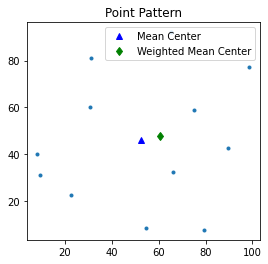

In [12]:
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Mean Center') 
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend(numpoints=1)

### Dispersion and Orientation

<b>Standard Distance & Standard Distance Circle</b>

$$
SD = \sqrt{\frac{\sum_{i=1}^{n} (x_i - x_m)^2}{n} + \frac{\sum_{i=1}^{n} (y_i - y_m)^2}{n}}
$$

The Standard distance is closely related to the usual definition of the standard deviation of a data set, and it provides a measure of how dispersed the events are around their mean center (𝑥𝑚,𝑦𝑚). Taken together, these measurements can be used to plot a summary circle (standard distance circle) for the point pattern, centered at  (𝑥𝑚,𝑦𝑚) with radius 𝑆𝐷, as shown below.

In [13]:
stdd = std_distance(pp.points)
stdd

40.14980648908671

Plot mean center as well as the standard distance circle.

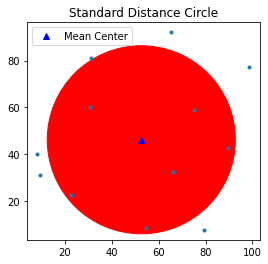

In [14]:
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

From the above figure, we can observe that there are five points outside the standard distance circle which are potential outliers.

<b>Standard Deviational Ellipse</b>

Compared with standard distance circle which measures dispersion using a single parameter 𝑆𝐷, standard deviational ellipse measures dispersion and trend in two dimensions through angle of rotation 𝜃, dispersion along major axis S<sub>𝑥</sub> and dispersion along minor axis S<sub>𝑦</sub>:

Major axis defines the direction of maximum spread in the distribution. S<sub>𝑥</sub> is the semi-major axis (half the length of the major axis):

$$
s_x = \sqrt{\frac{2 \left( \sum_{i=1}^{n} (x_i - \bar{x}) \cos(\theta) - \sum_{i=1}^{n} (y_i - \bar{y}) \sin(\theta) \right)^2}{n - 2}}
$$

Minor axis defines the direction of minimum spread and is orthogonal to major axis. S<sub>𝑦</sub> is the semi-minor axis (half the length of the minor axis):

$$
s_y = \sqrt{\frac{2 \left( \sum_{i=1}^{n} (x_i - \bar{x}) \sin(\theta) - \sum_{i=1}^{n} (y_i - \bar{y}) \cos(\theta) \right)^2}{n - 2}}
$$

The ellipse is rotated clockwise through an angle 𝜃:

$$
\theta = \arctan \left\{ 
\left( \sum_{i} (x_i - \bar{x})^2 - \sum_{i} (y_i - \bar{y})^2 \right) 
+ \frac{\left[ \left( \sum_{i} (x_i - \bar{x})^2 - \sum_{i} (y_i - \bar{y})^2 \right)^2 
+ 4 \left( \sum_{i} (x_i - \bar{x})(y_i - \bar{y}) \right)^2 \right]^{\frac{1}{2}}}{2 \sum_{i} (x_i - \bar{x})(y_i - \bar{y})} \right\}
$$


In [15]:
sx, sy, theta = ellipse(pp.points)
sx, sy, theta

(39.62386788646298, 42.753818949026815, 1.1039268428650906)

In [16]:
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse
theta_degree

63.250348987371304

The Standard Deviational Ellipse for the point pattern is rotated clockwise by 63.25 degrees.

<Figure size 432x288 with 0 Axes>

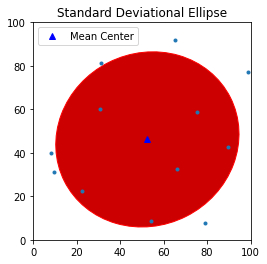

In [17]:
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
#ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree) #angle is rotation in degrees (anti-clockwise)
ax = pp.plot(get_ax=True, title='Standard Deviational Ellipse')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_aspect('equal')
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)
show()